## Supervised Learning:
We supervise a machine learning algorithm by providing inputs features (X) and corresponding output or target labels (y). The algorithm learns the underlying relationship between the input and the output in the form of a model. If we feed unseen new input data into the algorithm, it can predict the corresponding output.

### Regression
If the output or target is a continuous variable (e.g., price, height etc.), then it is a regression task. We have seen the Linear Regression algorithm.

### Classification
If the output or the target is a categorical variable , then it is a classification task. A categorical variable can be binary (e.g., malignant/benign) or multi-class (e.g., Freshman, Sophomore, Junior, Senior).
We have seen the Logistic Regression algorithm.

### Decision Tree
 A Decision Tree algorithm is a graph with nodes and edges. It can be used for both Regression tasks (DecisionTreeRegressor) and Classification tasks (DecisionTreeClassifier).

 Here is an example on the Titanic data set:

 <img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg">


### Importing packages

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE



### Decision Tree for Classification
We will use decision trees to classify whether a breast tumor is malignant or benign

In [2]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'] 

data = pd.read_csv(UCI_data_URL, names=names)

data.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
X = data.drop(['id_number', 'diagnosis'], axis=1)
y = data['diagnosis']

In [5]:

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y[0:10]


0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

### Encoding the categorical target variable
We will encode Malignant as 1 and Benign as 0

In [7]:
y = data['diagnosis'].map({'M':1, 'B':0})
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

### Decision Criteria

The process starts at the root node with the data set. The data set is split based on one of the features. The criteria "gini" and "entropy" are used to measure the degree of class purity.

We start with high entropy ("disorder") of a hetrogenous data set. We split the data in such a way that the entropy is reduced and we gain more information, i.e., the child nodes have more homogenous data.

The final nodes are the leaves without children. For the classification, a majority vote decides which class the leaf node represents. For the regression, the average of the values is the predicted value.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ns1.png">

<img src="https://miro.medium.com/max/2040/1*S6zcbdAzUvIOKBaWBKp9MA.png">

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)


In [9]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [10]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.9210526315789473

### Plot a Decision Tree
You can also check the package Graphviz

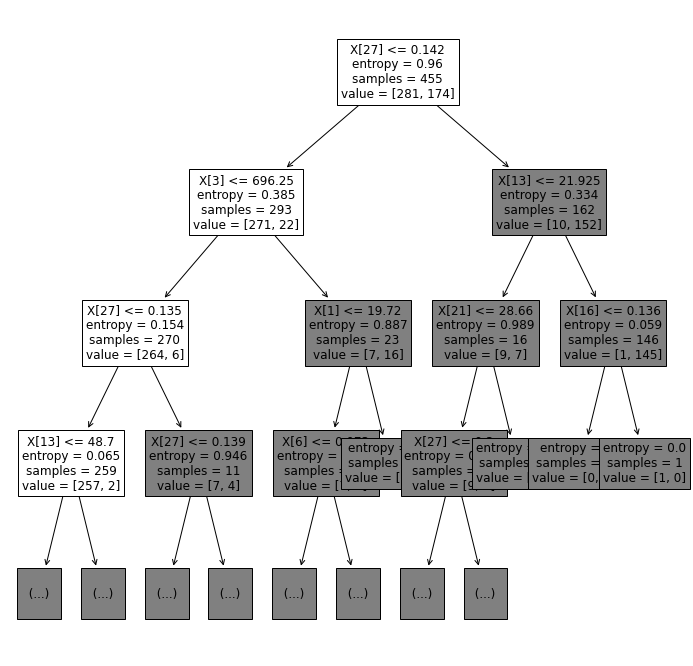

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

### Ensemble Methods

The Wisdom of the Crowd: Ask each of your friends to guess the price of an item. The average of their guesses is closer to the true price than each of the individual guesses.

Aristotle wrote: "It is possible that the many, though not individually good men, yet when they come together may be better, not individually but collectively, than those who are so, just as public dinners to which many contribute are better than those supplied at one man's cost"

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone ---Wikipedia


### Randomforest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. (Wikipedia)

Each tree splits a random subset of the features.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(X_train, y_train)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.956140


### Boosting
Boosting is an ensemble method that changes a set of weak learners into  strong learners.

The errors of the previous learner are given more weight and become the focus of the next learner

<img src="https://miro.medium.com/max/544/1*m2UHkzWWJ0kfQyL5tBFNsQ.png">

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. [Documentation](https://xgboost.readthedocs.io/en/latest/)

XGBoost is popular in Kaggle; many people win competitions using XGBoost.

In [13]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.947368


### Cross-Validation
So far we have splitted the data into a training and a test set. Cross-Validation is a method of rotating training and test subsets of the data. The result makes the algorithm more robust when it comes to generalizations,i.e., testing on unseen data

<img src="https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png">

In [14]:
#DMatrix is a internal data structure that used is by XGBoost 
# which is optimized for both memory efficiency and training speed
data_dmatrix = xgb.DMatrix(data=X,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.952502


###  Regression
The target is a continuous variable (e.g., price of a house)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.3,random_state=99)

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=99)
DecisionTreeRegressor()

In [16]:
X=boston.data
y=boston.target
RMSE_CV = - cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv= 10)
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)

In [19]:
#  RMSE for CV
print('CV RMSE: {:.2f}'.format(RMSE_CV.mean()))


# Test RMSE
print('Test RMSE: {:.2f}'.format(MSE(y_test, y_pred_test, squared=False)))


CV RMSE: 5.53
Test RMSE: 5.41


In [18]:

boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror","max_depth":4, "alpha":1}
cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=99)
cv_results["test-rmse-mean"].tail(1).values[0]


3.539434